# Uniform Distribution

In [1]:
from src.Utils import save_results, get_means
from src.ExistingAlgorithms import max_value, area, sklearn_available
from src.GaussianMixture import gaussian_mixture

from src.Parametric_UMAP import load_pumap
from src.Parametric_TSNE.train import load_model
from src.Parametric_TSNE.model import Network

from src.Dataset import dataset_dat

from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import Isomap, TSNE

import umap
import torch

# Import Data

In [2]:
# !cd 'src/Dataset/Data_Boulder' && zenodo_get 'https://doi.org/10.5281/zenodo.14101974'

# Compute

The entire file is precomputed and the results are saved in `src/Results_Uniform`.
The file is programmed to load the results if they are available in `PATH_RESULTS`.

## Data

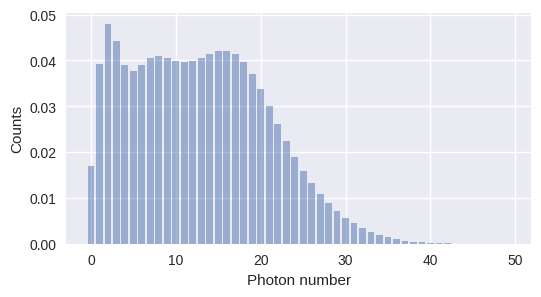

In [3]:
PATH_SAVE_LD = 'src/Results_Uniform/Low Dimension'
PATH_SAVE_D = 'src/Results_Uniform/Density'
PATH_RESULTS = 'src/Results_Uniform'
PATH_DATA = 'src/Dataset/Data_Boulder/data.zip'
PATH_R = 'src/Results_Uniform/randomIndexUniform.npy'

weights = [0.0003478958721172963, 0.0003456379713743067, 0.0003744276723215052, 2.7560595871623853e-07,
           5.1048808392493295e-18, 0.28842984940480537, 0.9999999999999999, 0.4483193456686096,
           0.34462236788026945, 0.42745454124885873, 6.426683431466243e-24, 3.0632312612371824e-29, 0.477042684930801]

data_train, data_test, expected_prob, db_train, db_test = dataset_dat(
   weights = weights,
   path_data = PATH_DATA,
   path_random_index = PATH_R,
   signal_size = 8192,
   interval = [0,350],
   standardize = True,
   plot_expected = True,
   plot_traces = False,
   n_photon_number = 50
)

## Methods

### Max Value

In [4]:
X_l_MAX = max_value(
   X_high = data_test, 
   filtering = True
)

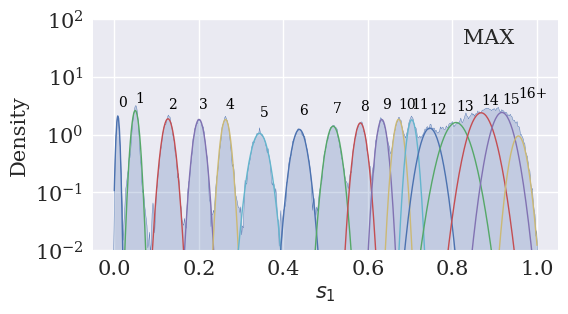

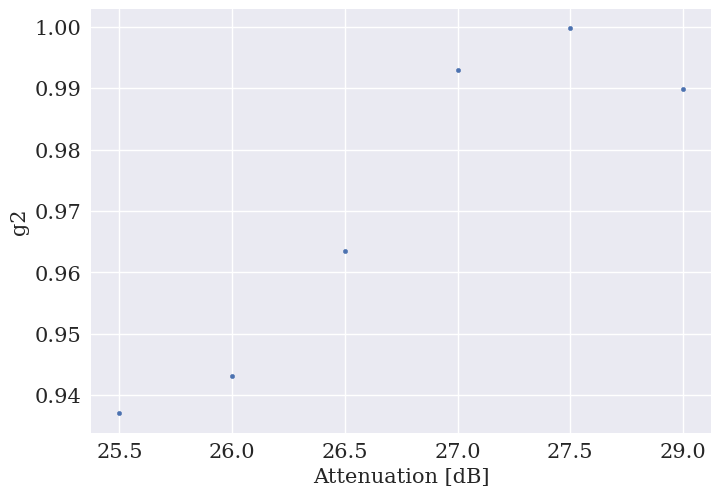

In [5]:
name_method = 'MAX'
gm = gaussian_mixture(
   X_low = X_l_MAX,
   X_high = data_test,
   means_init = get_means(name_method),
   number_cluster = 17,
   tol = 1e-4,
   cluster_iter = 10,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

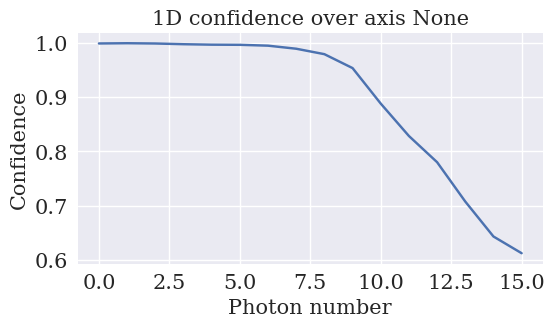

In [6]:
gm.plot_confidence_1d(expected_prob=expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Area

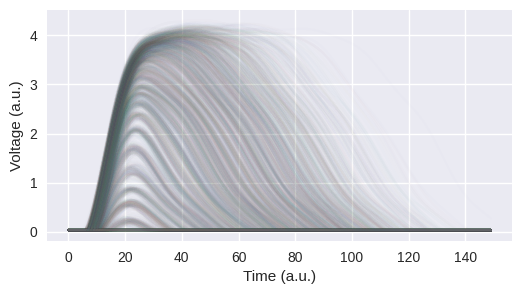

In [7]:
X_l_AREA  = area(
   X_high = data_test[:,:150], 
   filtering = True, 
   plot_filter = True, 
   threshold = 0.03, 
   critical_frequency = 0.1
)

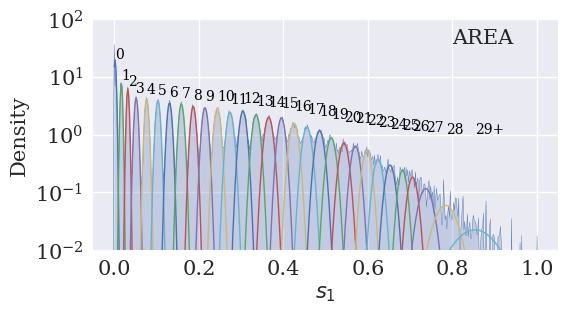

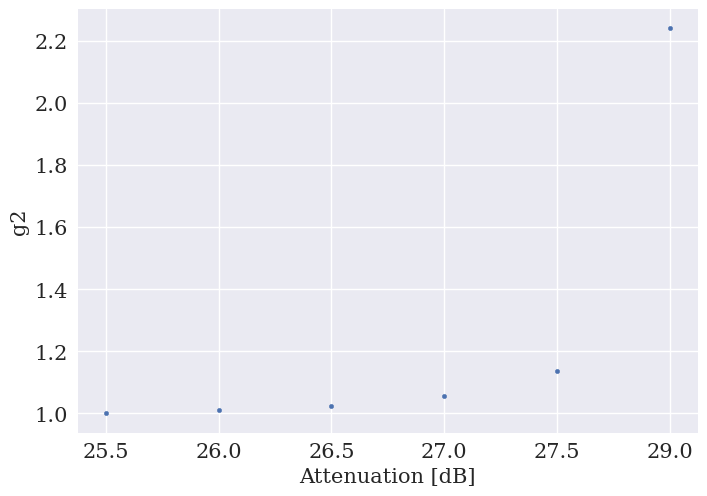

In [8]:
name_method = 'AREA'
gm = gaussian_mixture(
   X_low = X_l_AREA,
   X_high = data_test,
   number_cluster = 30,
   cluster_iter = 3,
   means_init = get_means(name_method, PATH_RESULTS),
   tol = 1e-4,
   width_plot=6,
   height_plot=3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

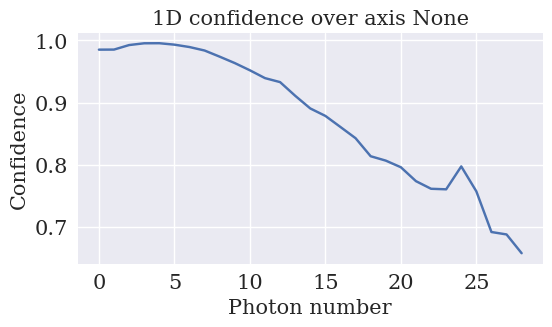

In [9]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Principal Component Analysis (PCA)

In [10]:
X_l_PCA = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = PCA, 
   n_components = 1, 
   random_state = 42
)

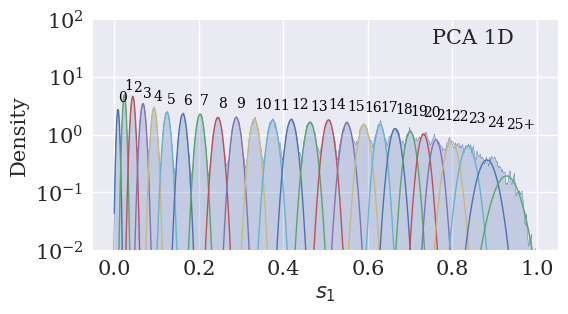

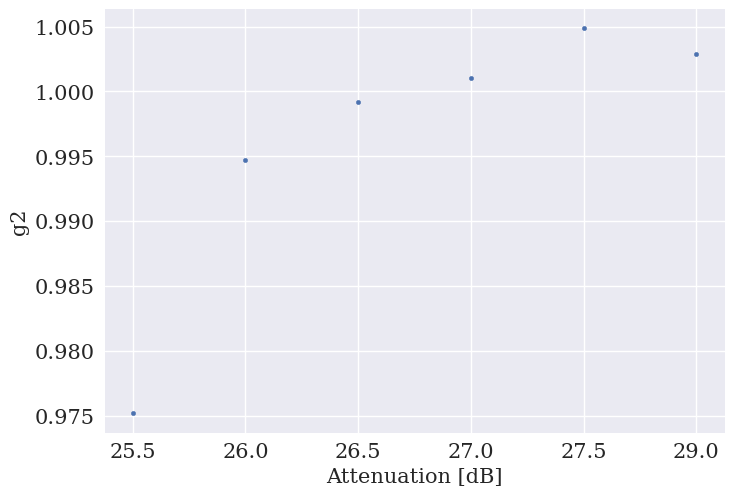

In [11]:
name_method = 'PCA 1D'
gm = gaussian_mixture(
   X_low = X_l_PCA,
   X_high = data_test,
   number_cluster = 26,
   cluster_iter = 5,
   means_init = get_means(name_method, PATH_RESULTS),
   tol = 1e-4,
   info_sweep = 0,
   plot_sweep = False,
   latex = False
)

gm.plot_density(
   bw_adjust = 0.03,
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

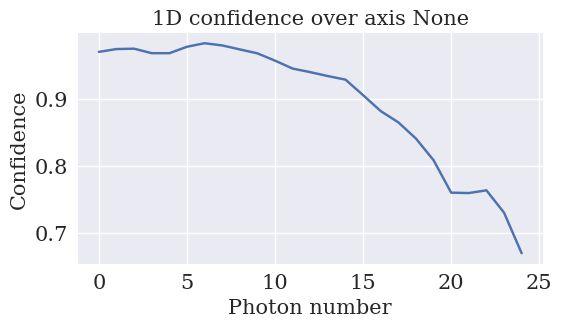

In [12]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

In [13]:
X_l_PCA = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = PCA, 
   n_components = 2, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


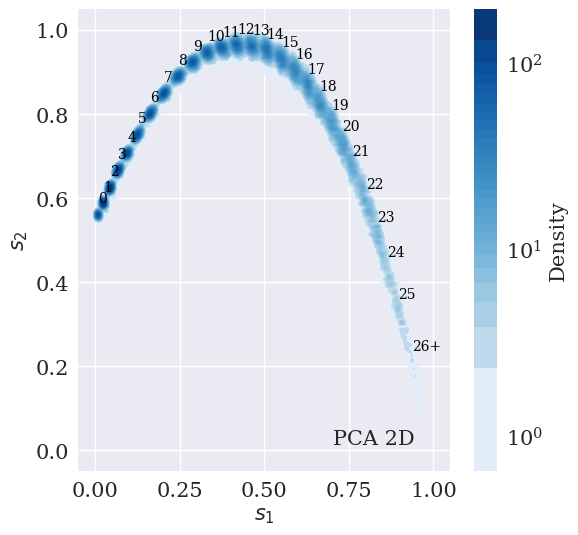

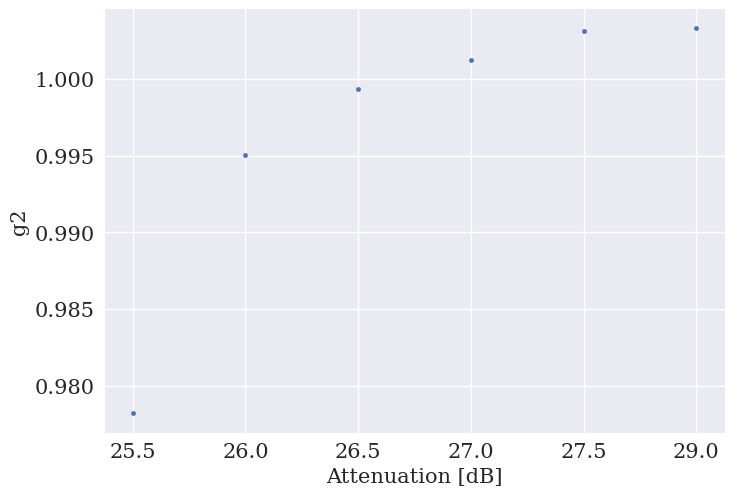

In [14]:
name_method = 'PCA 2D'
gm = gaussian_mixture(
   X_low = X_l_PCA,
   X_high = data_test,
   number_cluster = 27,
   cluster_iter = 5,
   means_init = get_means(name_method, PATH_RESULTS),
   tol = 1e-4,
   width_plot=6,
   height_plot=6
)

gm.plot_density(
   bw_adjust = 0.1,
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

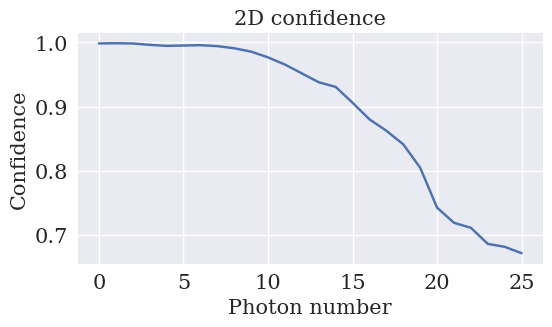

In [15]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Kernel PCA (Radial basis function)

In [16]:
X_l_KPCA_RBF = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = KernelPCA, 
   n_components = 2, 
   kernel="rbf", 
   gamma = 0.02, 
   random_state = 42
) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


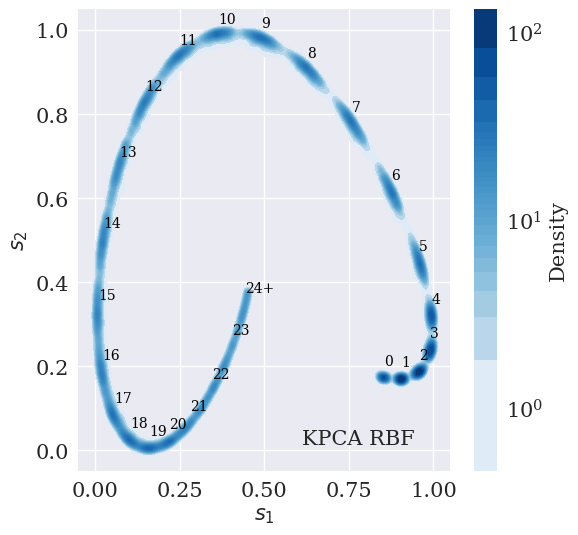

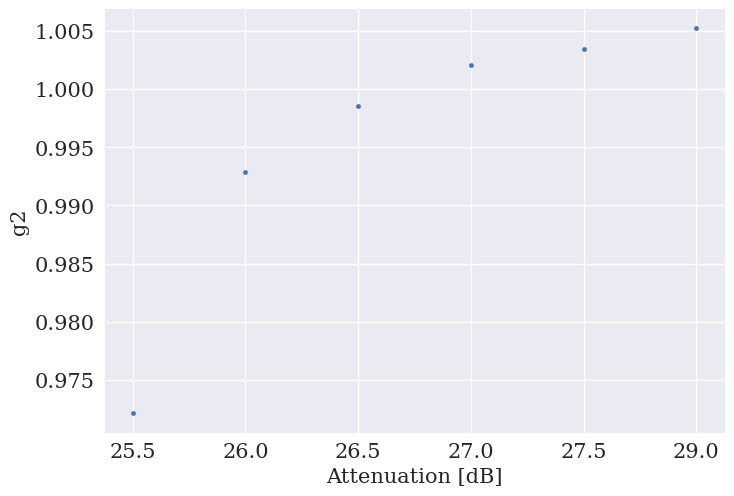

In [17]:
name_method = 'KPCA RBF'
gm = gaussian_mixture(
   X_low = X_l_KPCA_RBF,
   X_high = data_test,
   number_cluster = 25,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

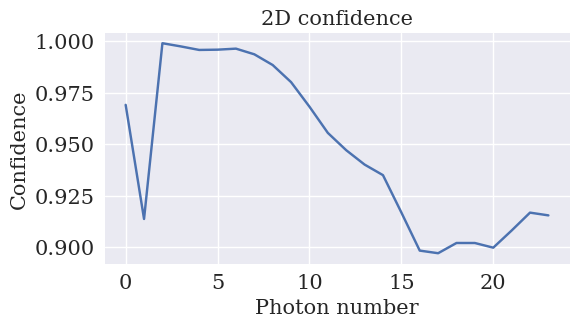

In [18]:
gm.plot_confidence_2d(expected_prob = expected_prob)
# gm.plot_trustworthiness()
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Kernel PCA (Sigmoid)

In [20]:
X_l_KPCA_S = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = KernelPCA,
   n_components = 1,
   kernel = "sigmoid",
   gamma = 0.002, 
   random_state = 42
) 

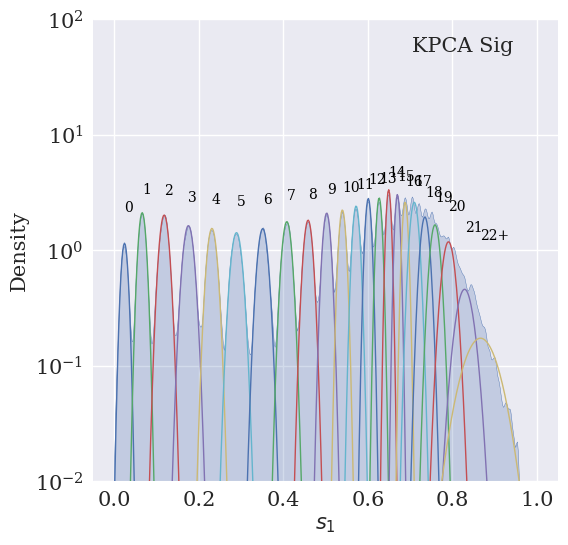

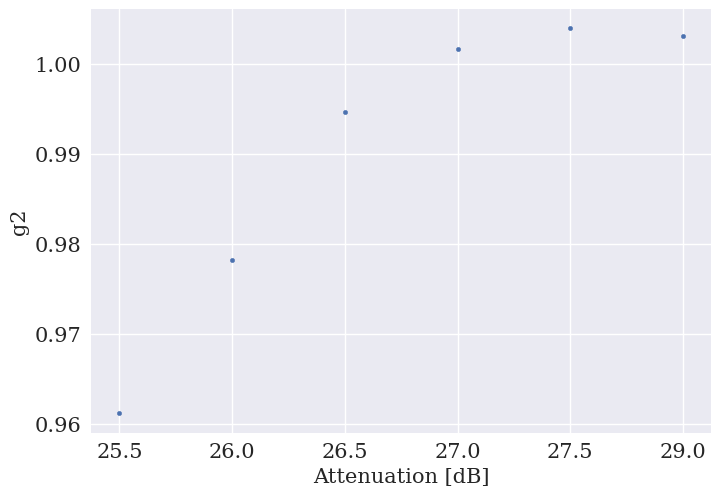

In [21]:
name_method = 'KPCA Sig'
gm = gaussian_mixture(
   X_low = X_l_KPCA_S,
   X_high = data_test,
   number_cluster = 23,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

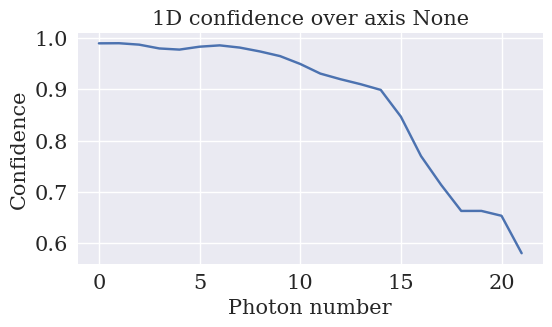

In [22]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Kernel PCA (Cosine)

In [23]:
X_l_KPCA_C = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = KernelPCA,
   n_components = 2,
   kernel = "cosine",
   gamma = 0.01, 
   random_state = 42
) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


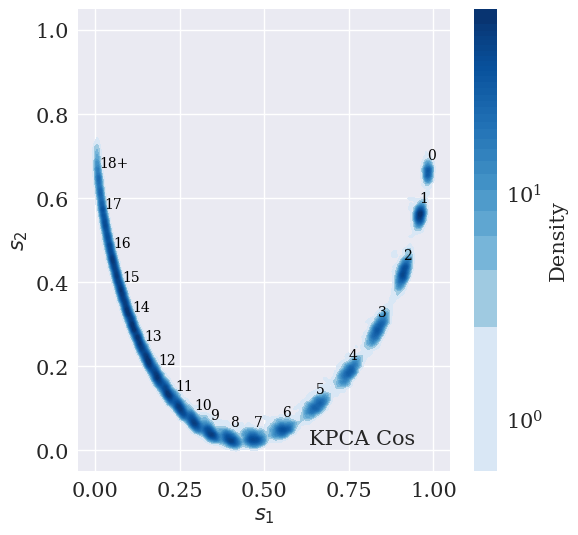

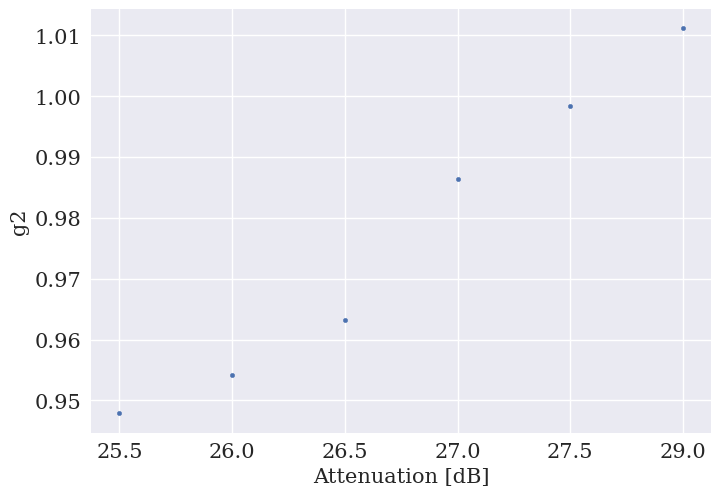

In [24]:
name_method = 'KPCA Cos'
gm = gaussian_mixture(
   X_low = X_l_KPCA_C,
   X_high = data_test,
   number_cluster = 19,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

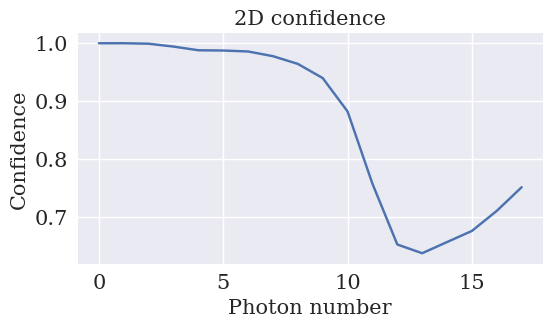

In [25]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [26]:
X_l_tSNE = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = TSNE,
   n_components = 2, 
   perplexity = 450, 
   random_state=42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


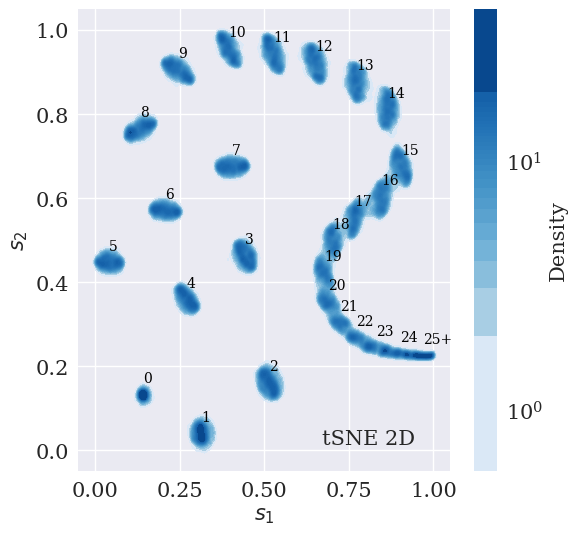

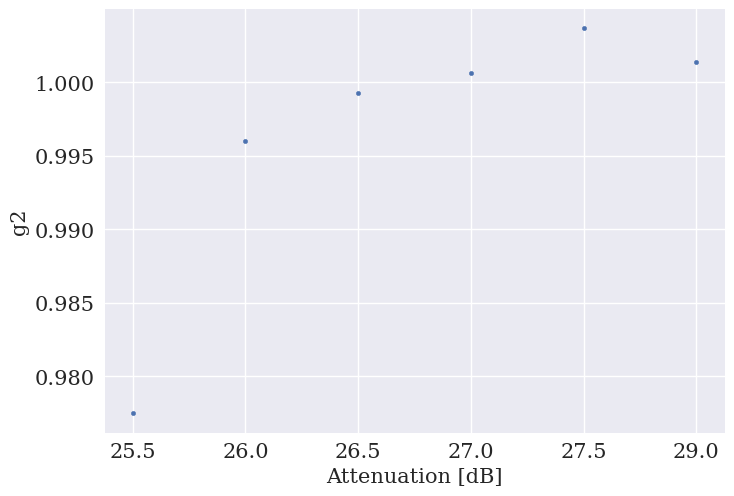

In [27]:
name_method = 'tSNE 2D'
gm = gaussian_mixture(
   X_low = X_l_tSNE,
   X_high = data_test,
   number_cluster = 26,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1,
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

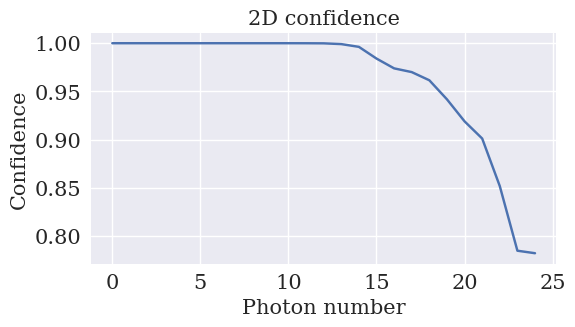

In [28]:
gm.plot_confidence_2d(expected_prob = expected_prob) 
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

In [29]:
X_l_tSNE = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = TSNE,
   n_components = 1, 
   perplexity = 450, 
   random_state = 42
)

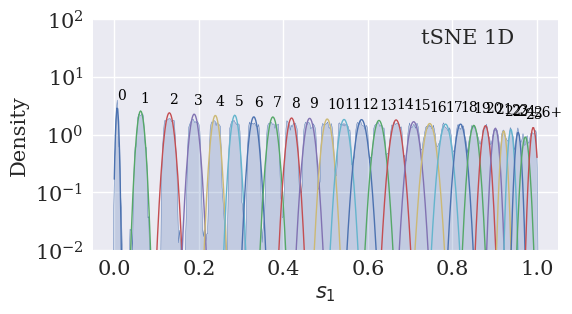

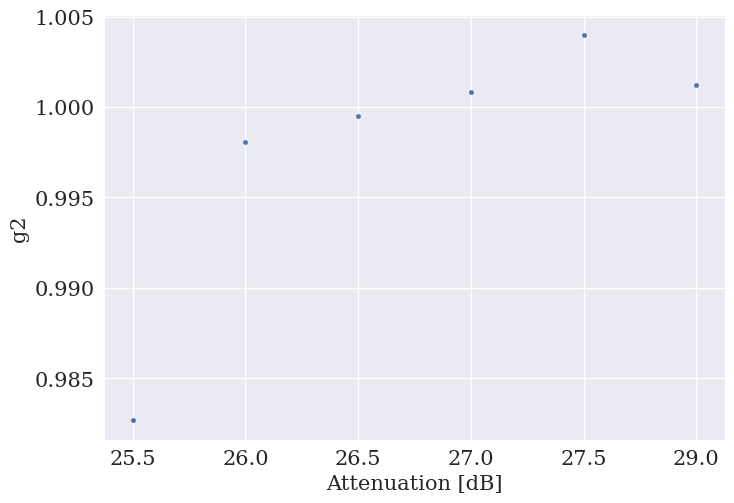

In [30]:
name_method = 'tSNE 1D'
gm = gaussian_mixture(
   X_low = X_l_tSNE,
   X_high = data_test,
   number_cluster = 27,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

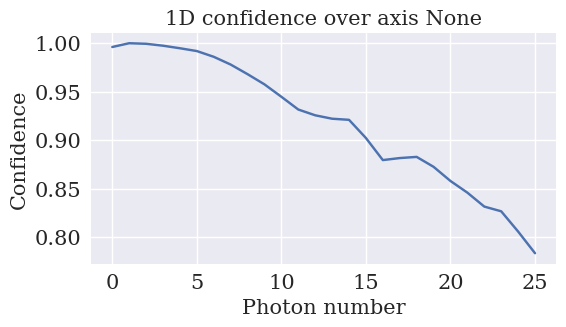

In [31]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

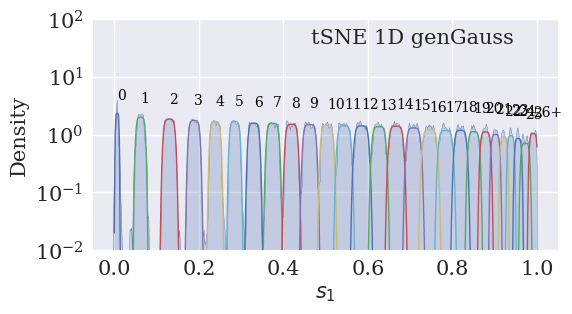

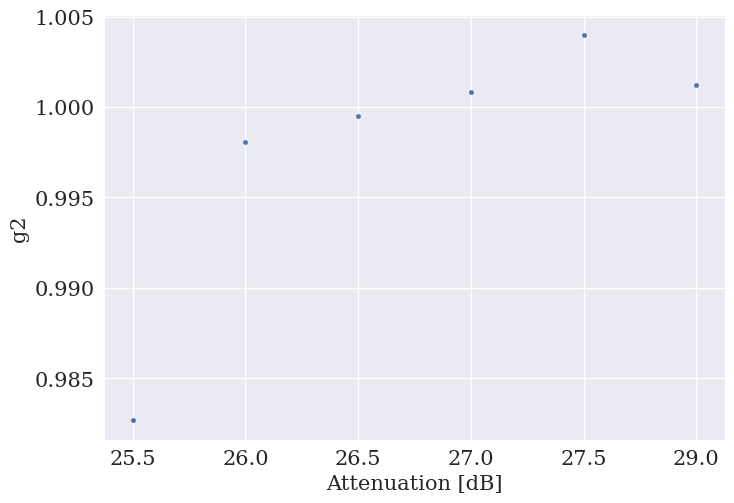

In [32]:
name_method = 'tSNE 1D genGauss'
gm = gaussian_mixture(
   X_low = X_l_tSNE,
   X_high = data_test,
   number_cluster = 27,
   cluster_iter = 5,
   tol = 1e-4,
   means_init = get_means(name_method, PATH_RESULTS),
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = False,
   plot_gen_gauss=True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

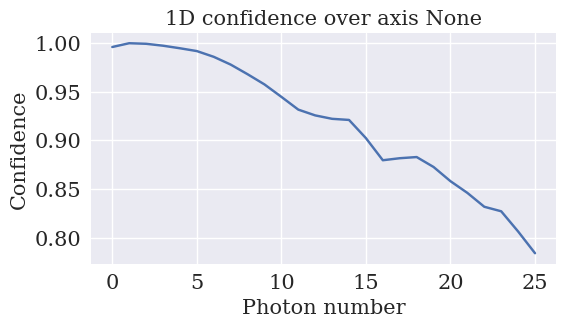

In [33]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
# gm.plot_trustworthiness()
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### UMAP

In [34]:
X_l_UMAP = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD+'/umap1d', 
   function = umap.UMAP, 
   custom_name = '1000.npy', 
   n_components = 1, 
   n_neighbors = 1000, 
   random_state = 42
)

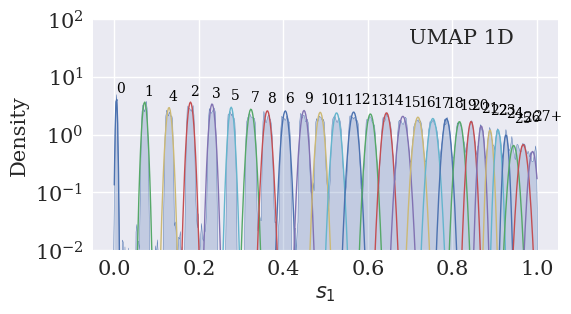

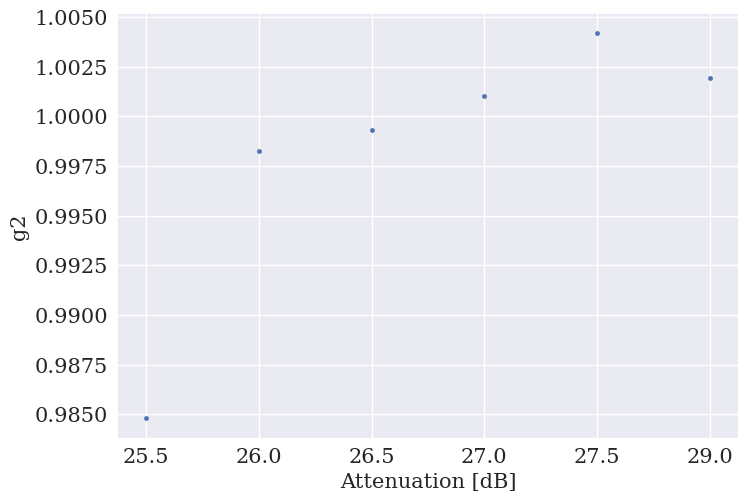

In [35]:
name_method = 'UMAP 1D'
gm = gaussian_mixture(
   X_low = X_l_UMAP,
   X_high = data_test,
   number_cluster = 28,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-4,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

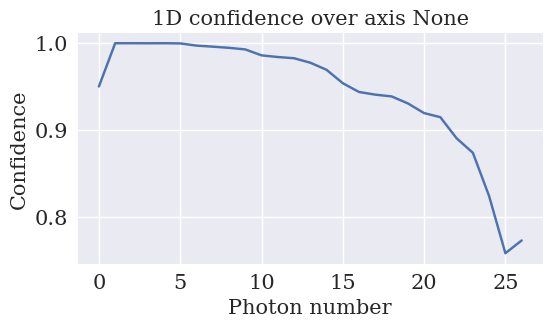

In [36]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

In [37]:
X_l_UMAP = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD+'/umap2d', 
   function = umap.UMAP, 
   custom_name = '700.npy',
   n_components = 2, 
   n_neighbors = 700, 
   random_state = 42
)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/sklearn/mixture/_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


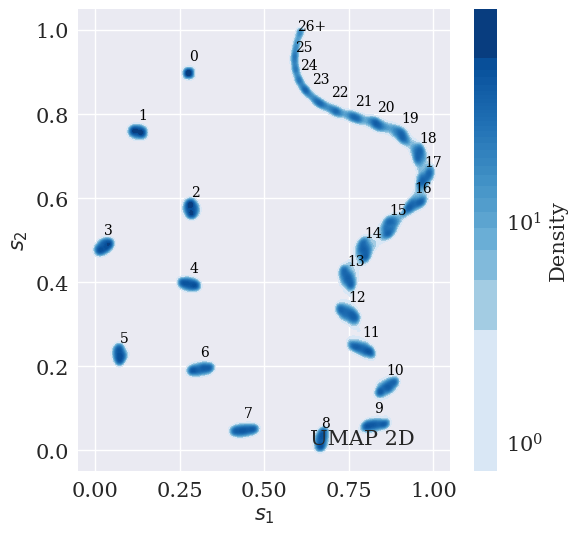

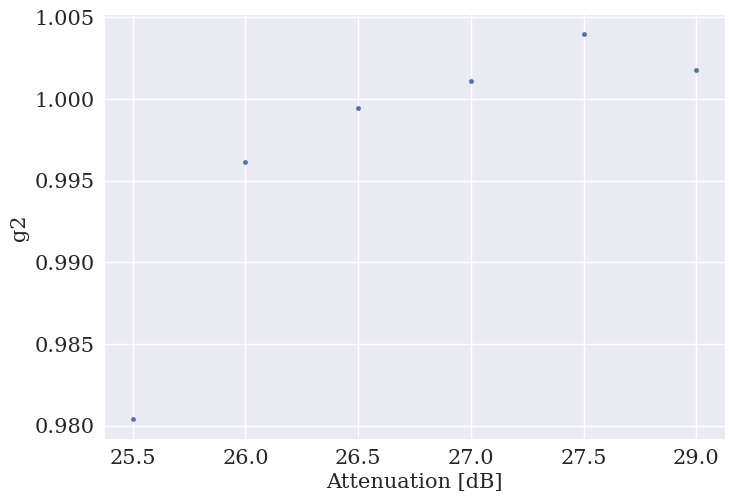

In [38]:
name_method = 'UMAP 2D'
gm = gaussian_mixture(
   X_low = X_l_UMAP,
   X_high = data_test,
   number_cluster = 27,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-8,
   width_plot = 6,
   height_plot = 6
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

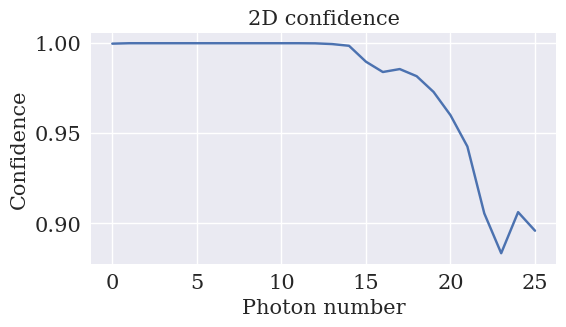

In [39]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Non-Negative Matrix Factorization (NMF)

In [40]:
X_l_NMF = sklearn_available(
   X_train = data_train+1, 
   X_test = data_test+1, 
   path_save = PATH_SAVE_LD, 
   function = NMF,
   n_components = 1, 
   max_iter = 400, 
   solver = 'mu', 
   beta_loss = 'kullback-leibler', 
   tol = 1e-10, 
   random_state = 42
)

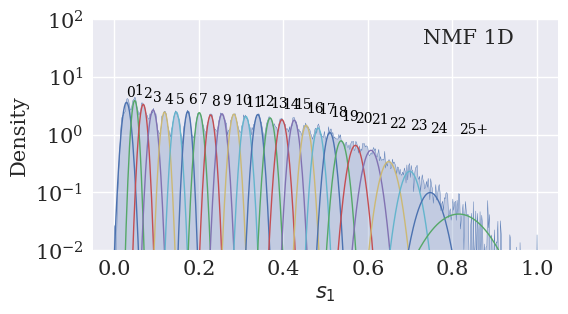

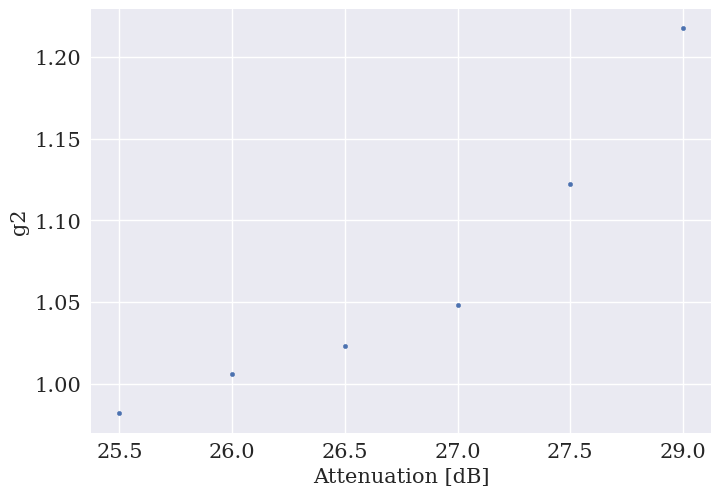

In [41]:
name_method = 'NMF 1D'
gm = gaussian_mixture(
   X_low = X_l_NMF,
   X_high = data_test,
   number_cluster = 26,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-4,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

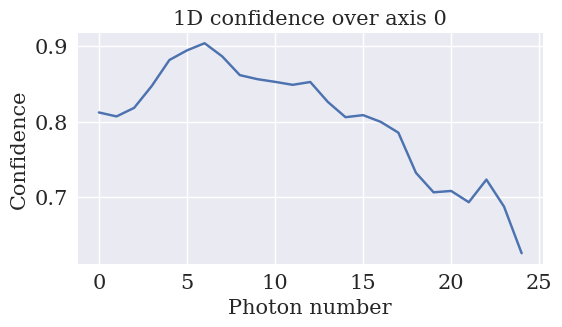

In [42]:
gm.plot_confidence_1d(expected_prob = expected_prob, axis=0)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Isomap

In [43]:
X_l_ISO = sklearn_available(
   X_train = data_train, 
   X_test = data_test, 
   path_save = PATH_SAVE_LD, 
   function = Isomap, 
   n_neighbors = 100, 
   n_components = 1, 
   eigen_solver = "arpack"
)

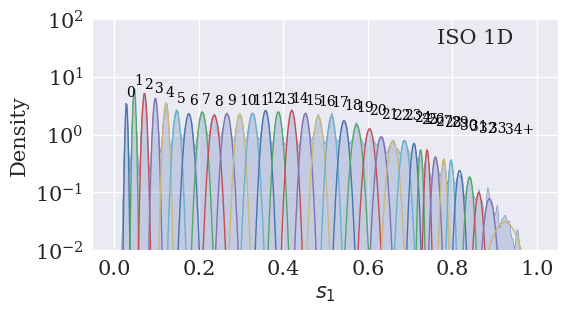

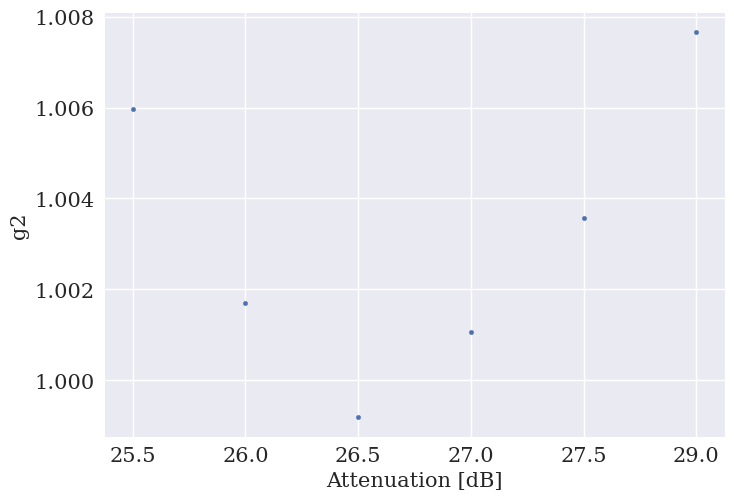

In [44]:
name_method = 'ISO 1D'
gm = gaussian_mixture(
   X_low = X_l_ISO,
   X_high = data_test,
   number_cluster = 35,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-4,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.1, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

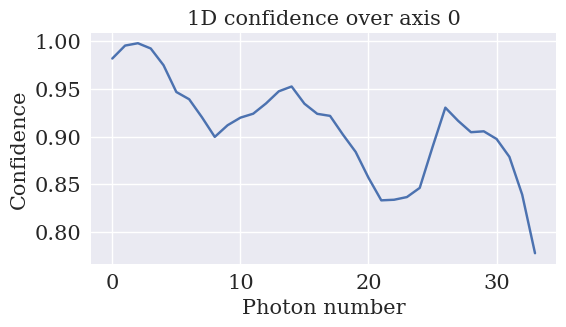

In [45]:
gm.plot_confidence_1d(expected_prob = expected_prob, axis=0)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Parametric t-SNE

In [46]:
model = load_model(Network, f'src/Parametric_TSNE/model 1D').to(device='cpu')

data_test_ = torch.from_numpy(data_test).float().view(-1, 350).to(device='cpu')
data_test_ = (data_test_ - data_test_.min()) / (data_test_.max() - data_test_.min())

with torch.no_grad():
    X_l_PTSNE = model(data_test_, encode = True).cpu().numpy()

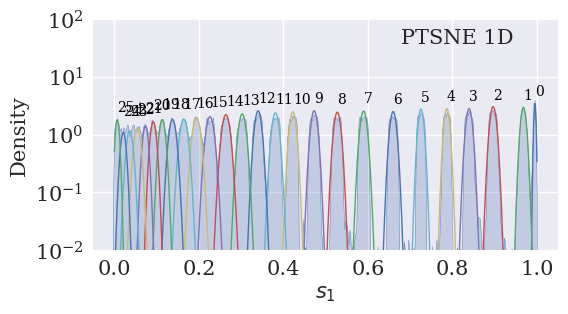

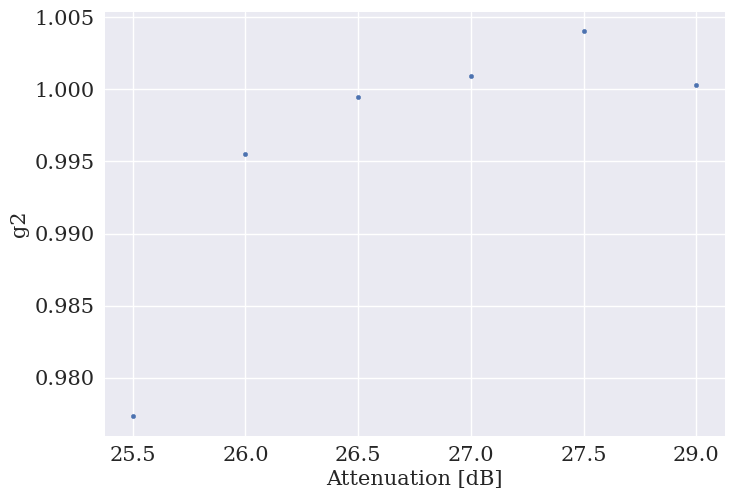

In [47]:
name_method = 'PTSNE 1D'
gm = gaussian_mixture(
   X_low = X_l_PTSNE,
   X_high = data_test,
   number_cluster = 26, 
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-4,
   width_plot = 6,
   height_plot = 3
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True, 
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

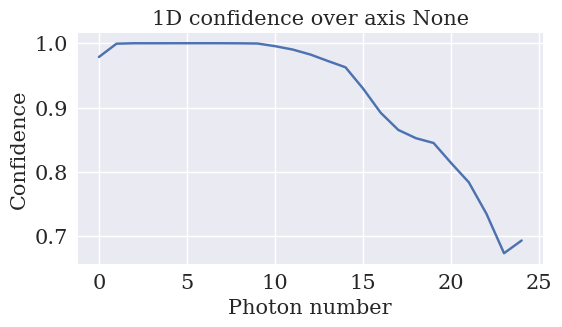

In [48]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)

### Parametric UMAP

In [49]:
model = load_pumap('src/Parametric_UMAP/model 1D/model.ckpt').to('cpu')
X_PUMAP = model.encoder(torch.from_numpy(data_test).view(-1,350).to(dtype=torch.float)).detach().numpy()

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:208: Attribute 'encoder' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['encoder'])`.


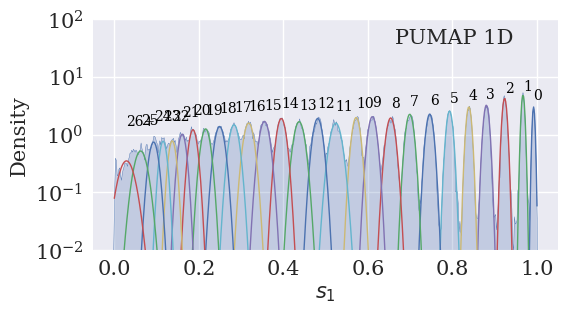

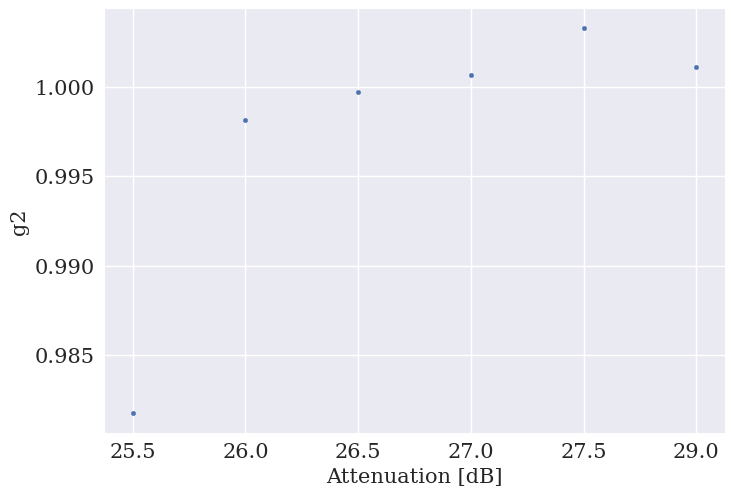

In [50]:
name_method = 'PUMAP 1D'
gm = gaussian_mixture(
   X_low = -X_PUMAP,
   X_high = data_test,
   number_cluster = 27,
   cluster_iter = 5,
   means_init = get_means(name_method, path = PATH_RESULTS),
   tol = 1e-5
)

gm.plot_density(
   bw_adjust = 0.03, 
   plot_gaussians = True,
   text = name_method,
   save_path = PATH_SAVE_D
)
gm.plot_g2(db_test)

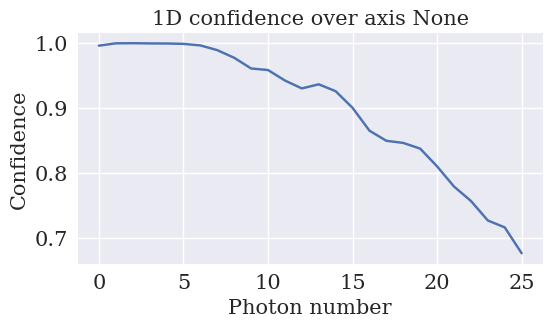

In [51]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(
   gm = gm, 
   name_method = name_method, 
   path = PATH_RESULTS
)